In [45]:
import tensorflow as tf

In [46]:
from tensorflow.examples.tutorials.mnist import input_data

In [47]:
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [48]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [49]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
mnist.train.images.shape #55000 images with an array of 784 positions each

(55000, 784)

In [51]:
mnist.train.images[2].shape

(784,)

In [52]:
sample = mnist.train.images[2034].reshape(28,28)

In [53]:
import matplotlib.pyplot as plt

In [54]:
%matplotlib inline

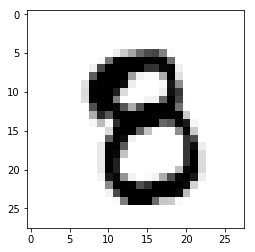

In [55]:
plt.imshow(sample, cmap='Greys')

In [56]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [57]:
n_classes = 10
n_samples = mnist.train.num_examples

In [58]:
n_input = 784

In [59]:
n_hidden_1 = 256
n_hidden_2 = 256

In [60]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(X * W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidde Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [61]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [62]:
weights

{'h1': <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>}

In [63]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [64]:
x = tf.placeholder('float',[None,n_input])

In [65]:
y = tf.placeholder('float',[None,n_classes])

In [66]:
pred = multilayer_perceptron(x,weights,biases)

In [67]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

In [68]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Training the Model

In [69]:
t = mnist.train.next_batch(1)

In [70]:
Xsamp, ysamp = t

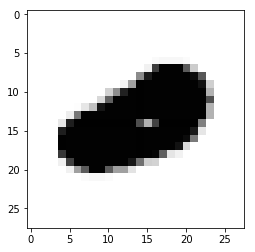

In [71]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [72]:
ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Run the Session

In [73]:
sess = tf.InteractiveSession()

In [74]:
init = tf.global_variables_initializer()

In [75]:
sess.run(init)

In [76]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost {:.4f}".format(epoch+1, avg_cost))
    
print('Model has completed {} Epochs of training'.format(training_epochs))    

Epoch: 1 cost 232.3059
Epoch: 2 cost 46.2293
Epoch: 3 cost 28.8589
Epoch: 4 cost 20.2544
Epoch: 5 cost 14.8581
Epoch: 6 cost 11.1613
Epoch: 7 cost 8.4544
Epoch: 8 cost 6.3315
Epoch: 9 cost 4.9079
Epoch: 10 cost 3.7539
Epoch: 11 cost 2.6272
Epoch: 12 cost 2.1307
Epoch: 13 cost 1.5739
Epoch: 14 cost 1.1627
Epoch: 15 cost 1.0047
Model has completed 15 Epochs of training


Model Evaluations

In [77]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [79]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [80]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [81]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [82]:
accuracy = tf.reduce_mean(correct_predictions)

In [83]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [85]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [88]:
# mnist.test.images[0]

In [90]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9469